<a href="https://colab.research.google.com/github/zhangyu027/Machine_learning/blob/main/Harvard%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data_path = "/content/drive/MyDrive/Colab Notebooks/HealthCare AI/Medical Image Diagnosis Convolutional Neural Networks/Harvard_Chest_XRay"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"
#data_path = "/content/drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 0.4
batch_size = 96
num_epochs = 20

In [47]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [48]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**

In [50]:
%run "/content/drive/MyDrive/Colab Notebooks/HealthCare AI/Medical Image Diagnosis Convolutional Neural Networks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

**MODEL TRAINING**

In [30]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "AlexNet", num_epochs)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Epoch 1/20: 100%|██████████| 1/1 [00:04<00:00,  4.70s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 2/20: 100%|██████████| 1/1 [00:03<00:00,  3.54s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 3/20: 100%|██████████| 1/1 [00:02<00:00,  2.26s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 4/20: 100%|██████████| 1/1 [00:02<00:00,  2.98s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 5/20: 100%|██████████| 1/1 [00:02<00:00,  2.63s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 6/20: 100%|██████████| 1/1 [00:02<00:00,  2.25s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 7/20: 100%|██████████| 1/1 [00:02<00:00,  2.23s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 8/20: 100%|██████████| 1/1 [00:02<00:00,  2.34s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 9/20: 100%|██████████| 1/1 [00:03<00:00,  3.13s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 10/20: 100%|██████████| 1/1 [00:02<00:00,  2.45s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 11/20: 100%|██████████| 1/1 [00:02<00:00,  2.43s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 12/20: 100%|██████████| 1/1 [00:02<00:00,  2.27s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 13/20: 100%|██████████| 1/1 [00:02<00:00,  2.36s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 14/20: 100%|██████████| 1/1 [00:03<00:00,  3.22s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 15/20: 100%|██████████| 1/1 [00:02<00:00,  2.27s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 16/20: 100%|██████████| 1/1 [00:02<00:00,  2.23s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 17/20: 100%|██████████| 1/1 [00:02<00:00,  2.27s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 18/20: 100%|██████████| 1/1 [00:02<00:00,  2.71s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 19/20: 100%|██████████| 1/1 [00:03<00:00,  3.05s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



Epoch 20/20: 100%|██████████| 1/1 [00:02<00:00,  2.23s/batch, Accuracy=1, Loss=0, Precision=1, Recall=1, F1 Score=1]


VALIDATION: Accuracy: 1.0000 | Loss: 0.0000 | Recall: 1.0000 | Precision: 1.0000 | F-score: 1.0000



In [31]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))

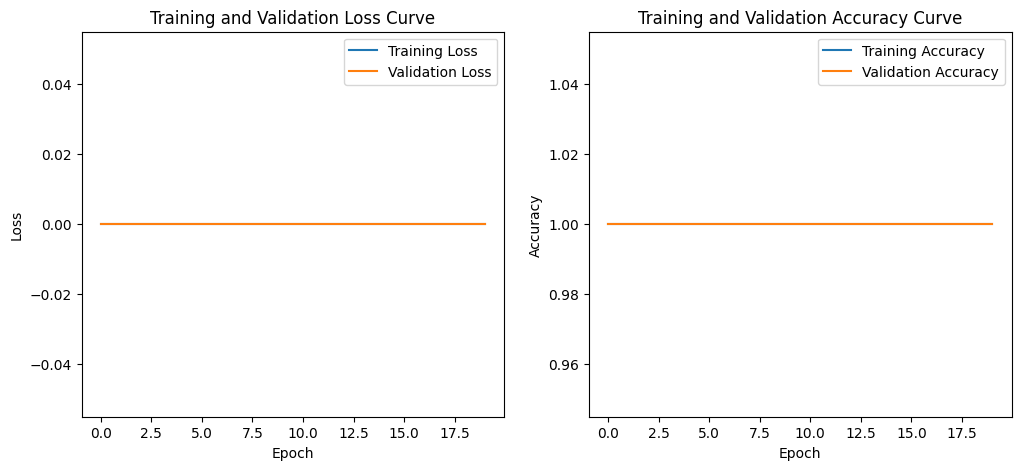

In [32]:
#Plotting the Loss and Accuracy Curves
plot_model_curves()

In [35]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

ZeroDivisionError: float division by zero

In [34]:
#Obtain TSNE Plot
plot_TSNE(train_loader, device, model)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ValueError: perplexity must be less than n_samples

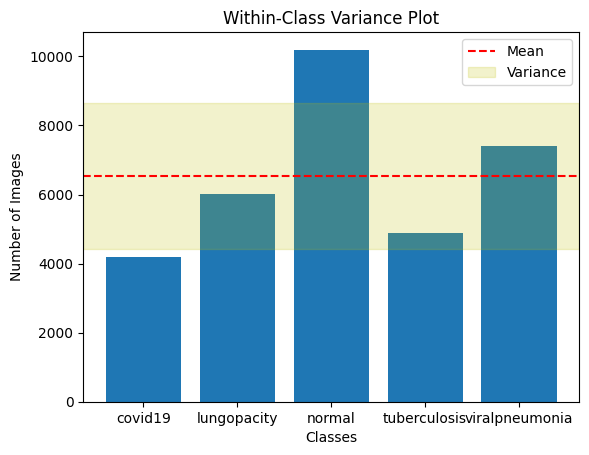

In [ ]:
#Plot the Within Class Variance of the Dataset for the Model
plot_within_class_variance(dataset)